# Tp6
## ej 1


In [4]:
import json
import pandas as pd
import dateutil
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

with open ('/home/santiago/bd2/data/result.json','r') as file:
    data = json.load(file)

df = pd.DataFrame(data["messages"])
df


,id,type,date,date_unixtime,actor,actor_id,action,inviter,text,text_entities,edited,edited_unixtime,from,from_id,members,reply_to_message_id,file,mime_type
0,1023,service,2022-09-01T13:06:10,1662048370,Markitos,user5107941451,join_group_by_link,Group,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1024,service,2022-09-01T15:13:07,1662055987,Lautaro G,user858971037,join_group_by_link,Group,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1025,service,2022-09-01T15:14:04,1662056044,jose ruti,user1274646303,join_group_by_link,Group,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1026,service,2022-09-01T18:02:39,1662066159,Ezequiel Garcia,user1264815356,join_group_by_link,Group,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1027,service,2022-09-02T13:37:57,1662136677,Nicolás Mayoral,user1531770772,join_group_by_link,Group,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1028,service,2022-09-03T01:22:52,1662178972,Alexis Linoo,user1688443825,join_group_by_link,Group,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1029,service,2022-09-03T20:59:14,1662249554,Bruno,user1133965522,join_group_by_link,Group,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1030,service,2022-09-03T21:35:07,1662251707,Lucas Galdame Villegas,user1106773171,join_group_by_link,Group,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1031,message,2022-09-05T18:16:23,1662412583,NaN,NaN,NaN,NaN,Buenas tardes a todos! Como estan? Recuerden q...,"[{'type': 'plain', 'text': 'Buenas tardes a to...",2022-09-08T18:16:04,1662671764,Matias Navarro,user846689643,NaN,NaN,NaN,NaN
9,1032,service,2022-09-06T12:04:22,1662476662,Brun#21,user848736550,invite_members,NaN,,[],NaN,NaN,NaN,NaN,[Douglas],NaN,NaN,NaN


,mensajes
from,
Aaron Moya,2
Brun#21,1
Douglas,1
Mariela Asensio,6
Markitos,1
Matias Navarro,17
Nicolás Mayoral,5


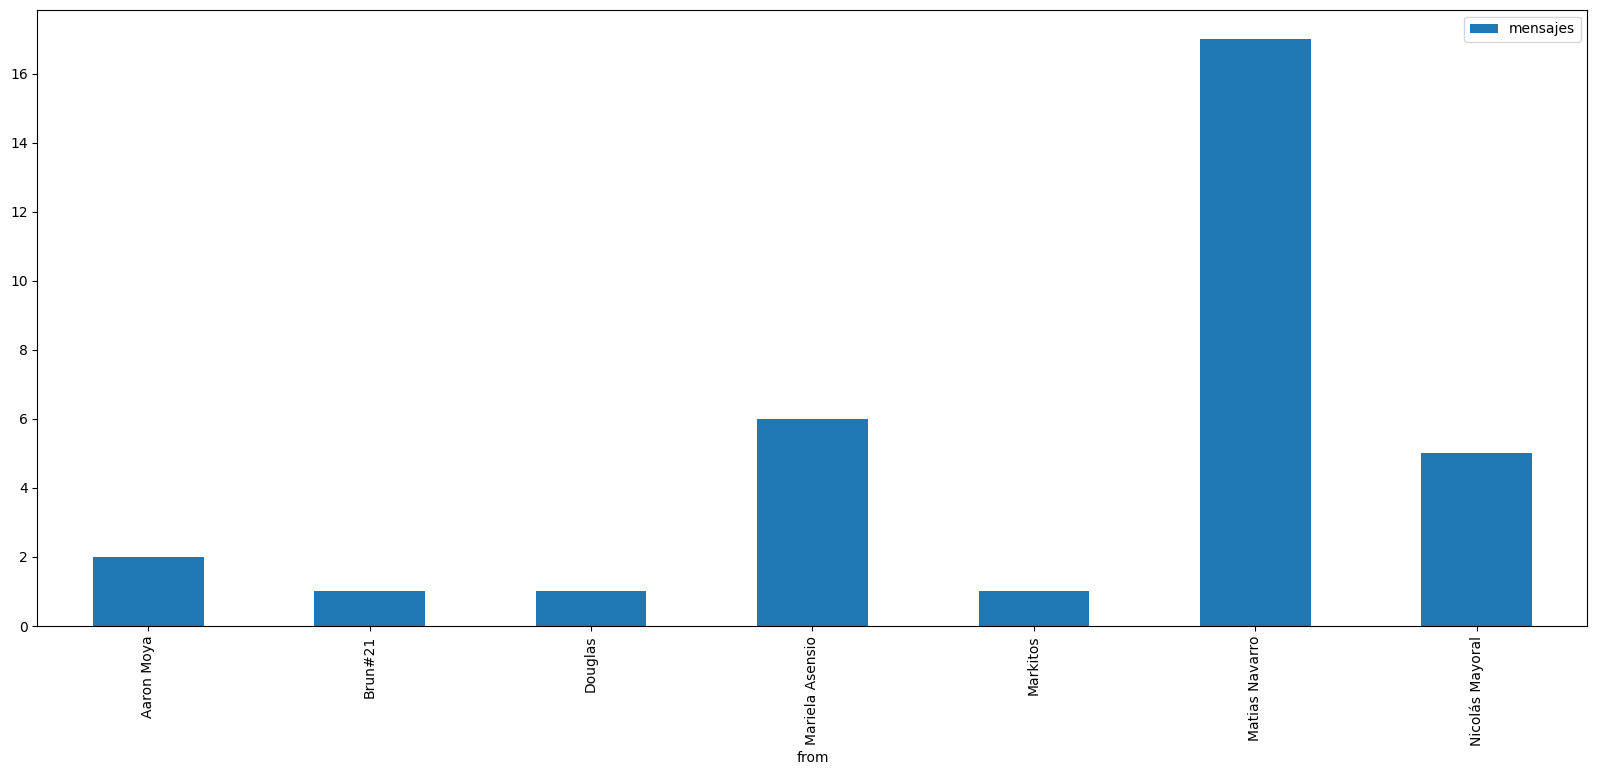

In [8]:
groups = ['from']
df2 = df.groupby(groups).agg(mensajes = ('text','count'))
df2.plot(kind = 'bar', figsize=(20,8))
df2

## total de palabras por usuario y despues graficado en barras


,Palabras Totales
from,
Aaron Moya,22.000000
Brun#21,16.000000
Douglas,2.000000
Mariela Asensio,19.333333
Markitos,56.000000
Matias Navarro,45.882353
Nicolás Mayoral,17.800000


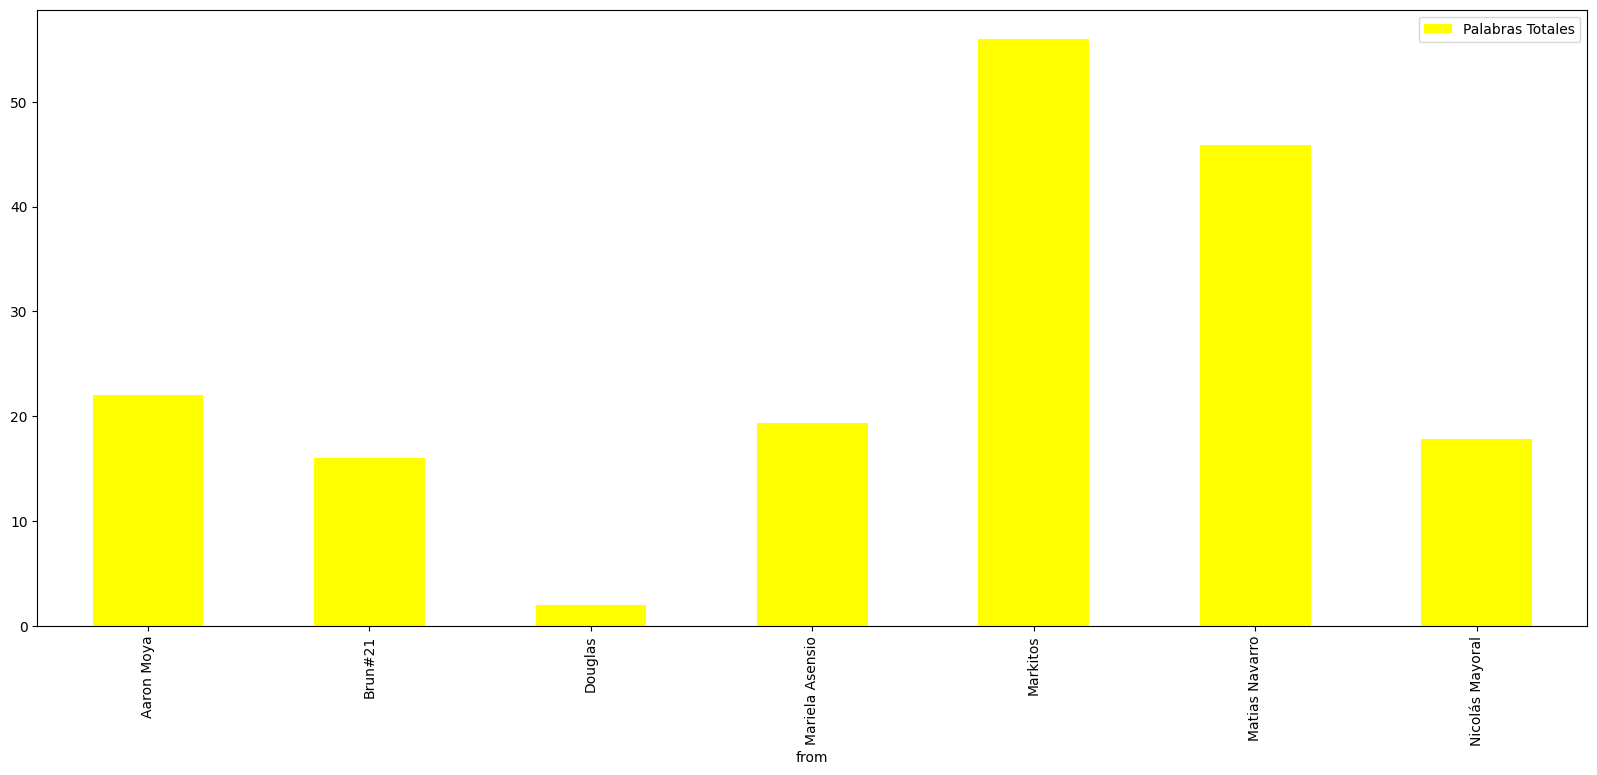

In [20]:
df['Palabras Totales'] = [len(str(x).split(" ")) for x in df['text']]
df2 = df.groupby(['from'])[['Palabras Totales']].mean()
df2.plot(kind='bar', figsize=(20,8), color="yellow")
df2

## 2

,promedio
from,
Aaron Moya,4.545455
Brun#21,2.272727
Douglas,2.272727
Mariela Asensio,13.636364
Markitos,2.272727
Matias Navarro,38.636364
Nicolás Mayoral,11.363636


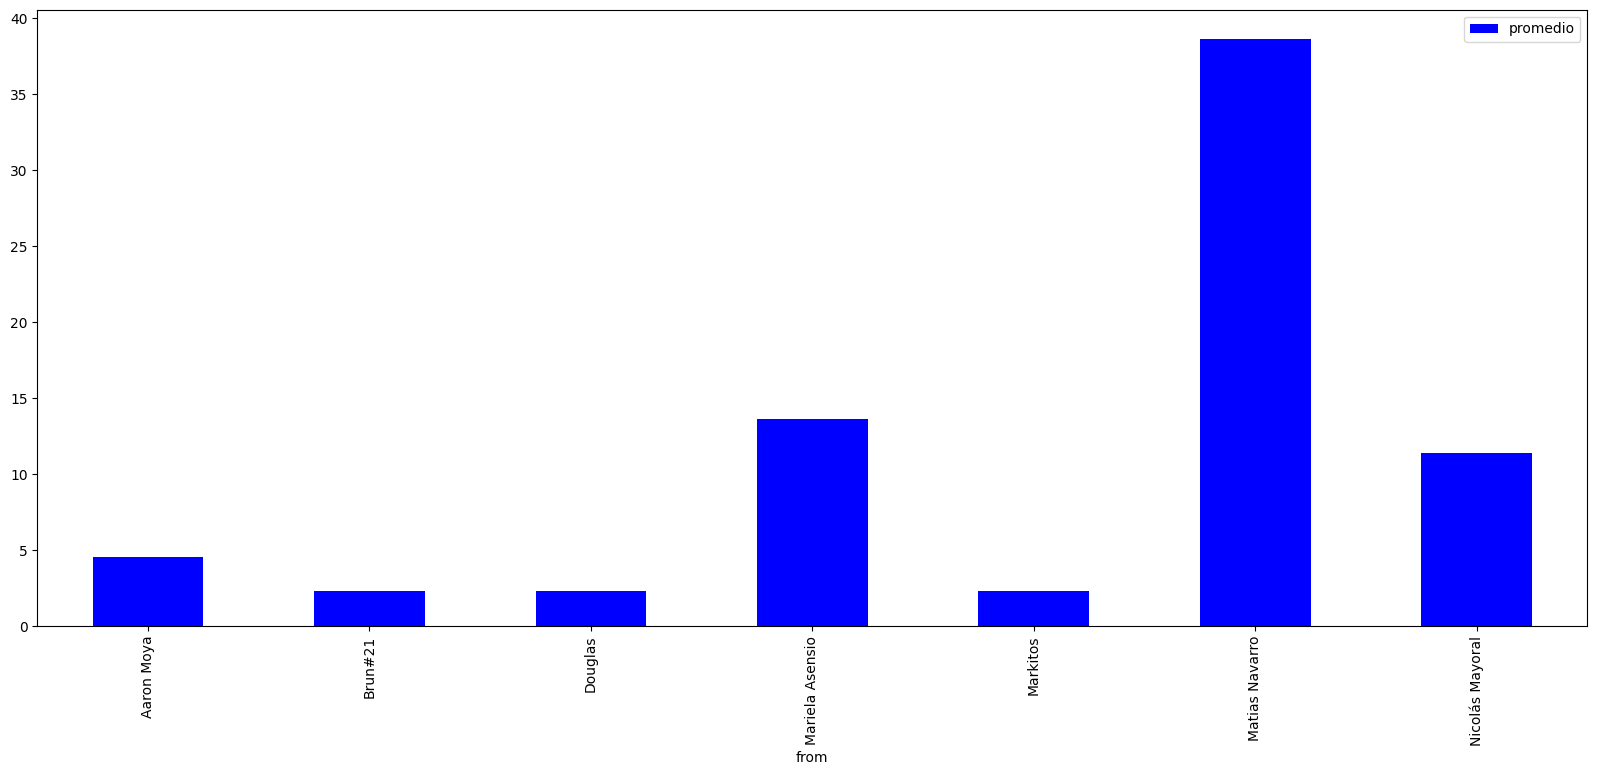

In [34]:
total_messages = df['id'].count()
df2 = df.groupby(['from']).agg(promedio=('id',lambda x: (x.count()/total_messages)*100))
df2.plot(kind='bar', figsize=(20,8), color="blue")
df2

## 3


/tmp/ipykernel_6259/489174467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'][contador] = i[1]
/tmp/ipykernel_6259/489174467.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hora'][indice] = j[0]


,cantidad_mensajes
hora,
01,1
09,4
12,2
13,2
14,3
15,3
16,3
17,5
18,8


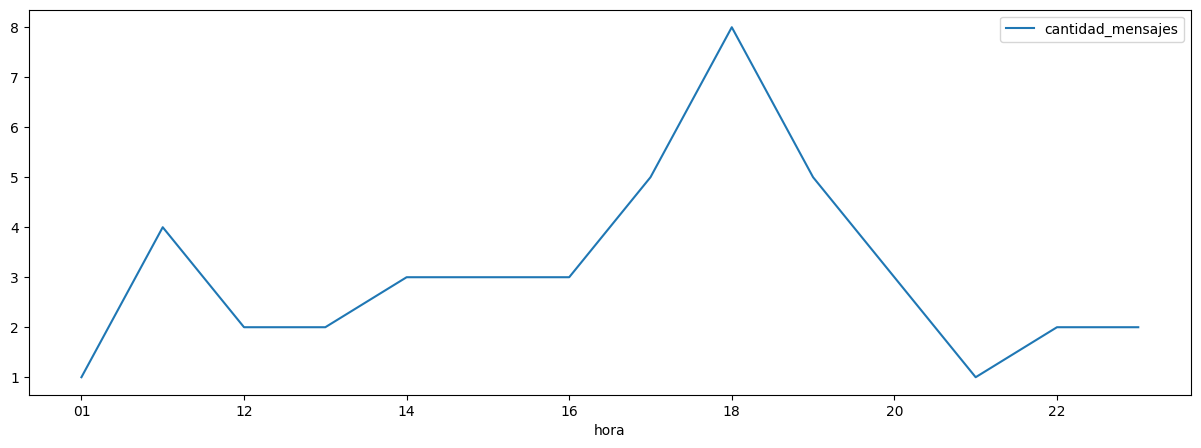

In [22]:
df['fecha'] = [str(x).split("T") for x in df['date']]
contador = int(0)
for i in df['fecha']:
    df['fecha'][contador] = i[1]
    contador += 1
df['fecha'] = [str(x).split(":") for x in df['fecha']]
indice = int(0)
df['hora'] = ''
for j in df['fecha']:
    df['hora'][indice] = j[0]
    indice += 1  
df2 = df.groupby(df['hora']).agg(cantidad_mensajes=('id', "count"))
df2.plot(figsize=(15,5))
df2



## 4

/tmp/ipykernel_6259/815903011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'][contador] = i[1]
/tmp/ipykernel_6259/815903011.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hora'][indice] = j[0]
/tmp/ipykernel_6259/815903011.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['time'][contador] = i[0]


,,cantidad_mensajes
from,time,
Aaron Moya,15,1
Brun#21,20,1
Douglas,12,1
Mariela Asensio,16,2
Markitos,17,1
Matias Navarro,18,7
Nicolás Mayoral,14,3


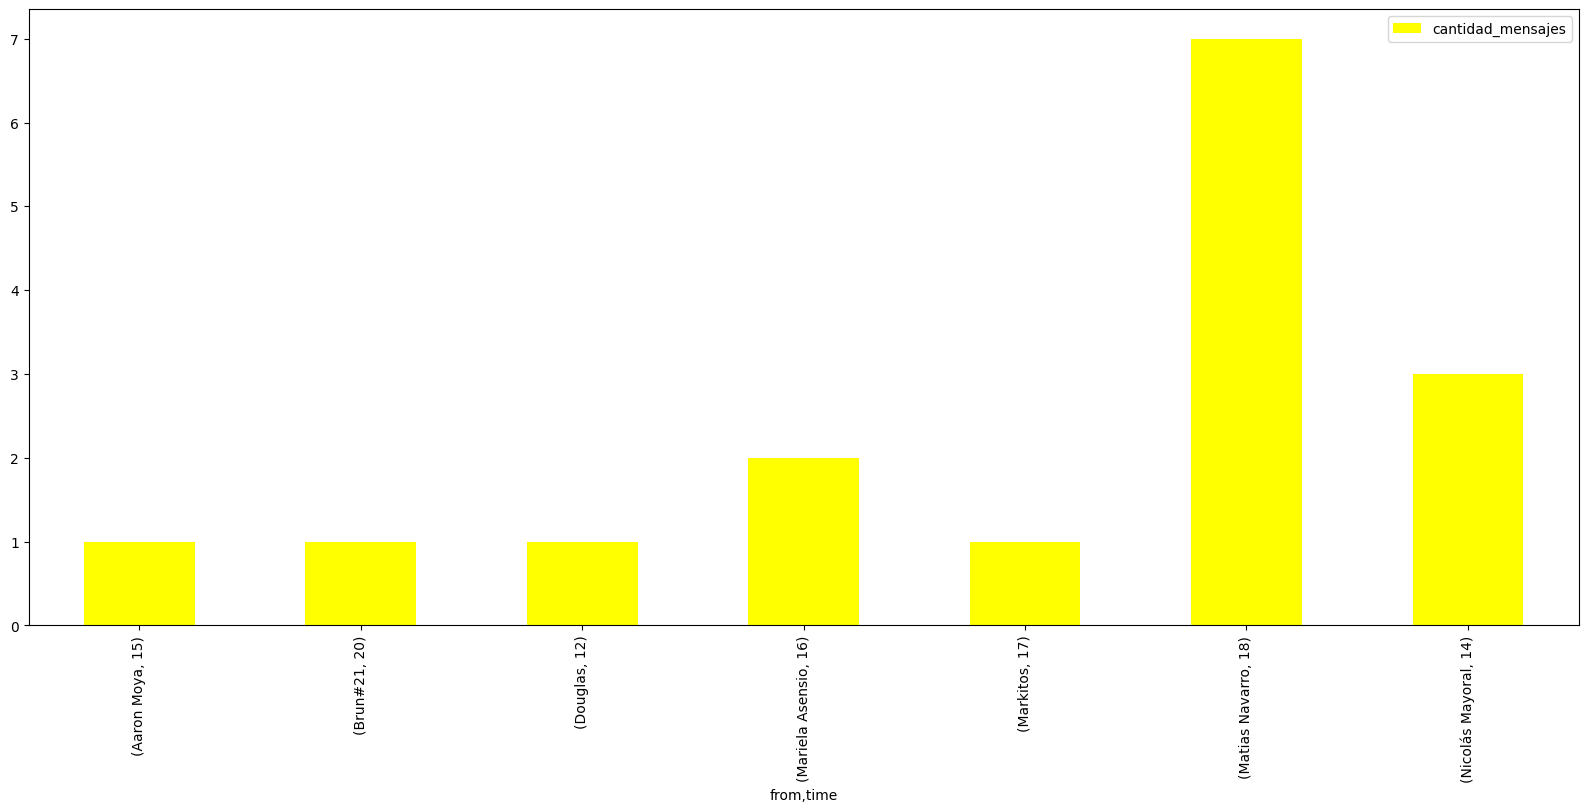

In [24]:

df['fecha'] = [str(x).split("T") for x in df['date']]
contador = int(0)
for i in df['fecha']:
    df['fecha'][contador] = i[1]
    contador += 1
df['fecha'] = [str(x).split(":") for x in df['fecha']]
indice = int(0)
df['hora'] = ''
for j in df['fecha']:
    df['hora'][indice] = j[0]
    indice += 1 
contador = 0
lista_horas = []
df2 = df.groupby(['from','hora'], as_index=False).agg(cantidad_mensajes = ('hora',"count"))
for i in df2['hora']:
    lista_horas.append((i, df2['cantidad_mensajes'][contador]))
    contador += 1
df2 = df2.groupby(['from'], as_index=False)[['cantidad_mensajes']].max()  
contador = 0
lista_maximos = []
for i in df2['cantidad_mensajes']:
    lista_maximos.append(i)
    contador += 1
df2['time'] = ''
contador = 0
for i in lista_horas:
    if contador < len(lista_maximos):
        if i[1] == lista_maximos[contador]:
            df2['time'][contador] = i[0]
            contador += 1
df2 = df2.set_index(['from','time'])
df2.plot(kind='bar', figsize=(20,8), color="yellow")
df2


## 5


/tmp/ipykernel_6259/289216458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dia'][contador] = i[0]
/tmp/ipykernel_6259/289216458.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['day'][contador] = i[0]
/tmp/ipykernel_6259/289216458.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['day'][contador] = 'Martes'
/tmp/ipykernel_6259/289216458.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,,cantidad_mensajes
from,day,
Aaron Moya,Martes,2
Brun#21,Martes,1
Douglas,Martes,1
Mariela Asensio,Martes,5
Markitos,Martes,1
Matias Navarro,Martes,11
Nicolás Mayoral,Viernes,3


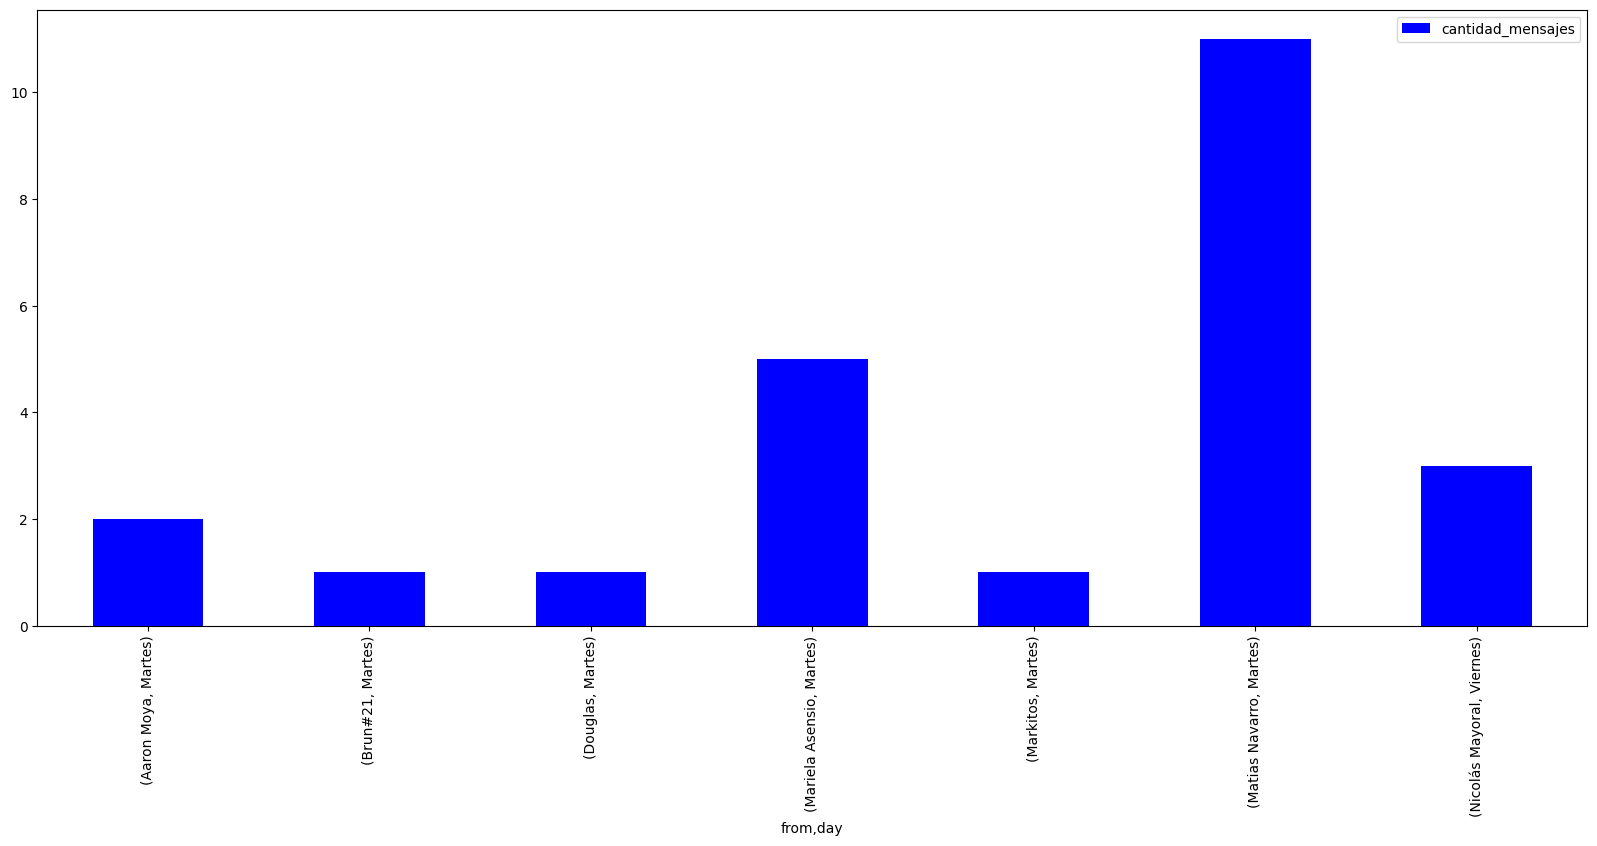

In [26]:
df['fecha'] = [str(x).split("T") for x in df['date']]
contador = int(0)
df['dia'] = ''
for i in df['fecha']:
    df['dia'][contador] = i[0]
    contador += 1
df['dia'] = pd.to_datetime(df['dia'], format="%Y-%m-%d") 
df2 = df.groupby(['from',df['dia'].dt.weekday], as_index=False).agg(cantidad_mensajes = ('id', "count"))
df_aux = df.groupby(['from',df['dia'].dt.weekday]).agg(cantidad_mensajes = ('id', "count"))
lista_indices = []
contador = 0
for i in df_aux.index:
    lista_indices.append((i[1], df_aux['cantidad_mensajes'][contador]))
    contador += 1
df2 = df2.groupby(['from'], as_index=False)[['cantidad_mensajes']].max()  
contador = 0
lista_maximos = []
for i in df2['cantidad_mensajes']:
    lista_maximos.append(int(i))
    contador += 1
df2['day'] = ''
contador = 0
for i in lista_indices:
    if contador < len(lista_maximos):
        if i[1] == lista_maximos[contador]:
            df2['day'][contador] = i[0]
            contador += 1
contador = 0
for i in df2['day']:
    if i == 0:
        df2['day'][contador] = 'Lunes'
        contador += 1
    if i == 1:
        df2['day'][contador] = 'Martes'
        contador += 1
    if i == 2:
        df2['day'][contador] = 'Miércoles'
        contador += 1
    if i == 3:
        df2['day'][contador] = 'Jueves'  
        contador += 1
    if i == 4:
        df2['day'][contador] = 'Viernes'
        contador += 1
    if i == 5:
        df2['day'][contador] = 'Sábado'
        contador += 1
    if i == 6:
        df2['day'][contador] = 'Domingo'    
        contador += 1
df2 = df2[['from', 'day', 'cantidad_mensajes']]
df2 = df2.set_index(['from','day'])
df2.plot(kind='bar', figsize=(20,8), color="blue")
df2

## 6

/tmp/ipykernel_6259/2708674758.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'][contador] = i[0]


,,cantidad_mensajes
from,day,
Aaron Moya,Martes,2
Brun#21,Martes,1
Douglas,Martes,1
Mariela Asensio,Martes,5
Markitos,Martes,1
Matias Navarro,Martes,11
Nicolás Mayoral,Viernes,3


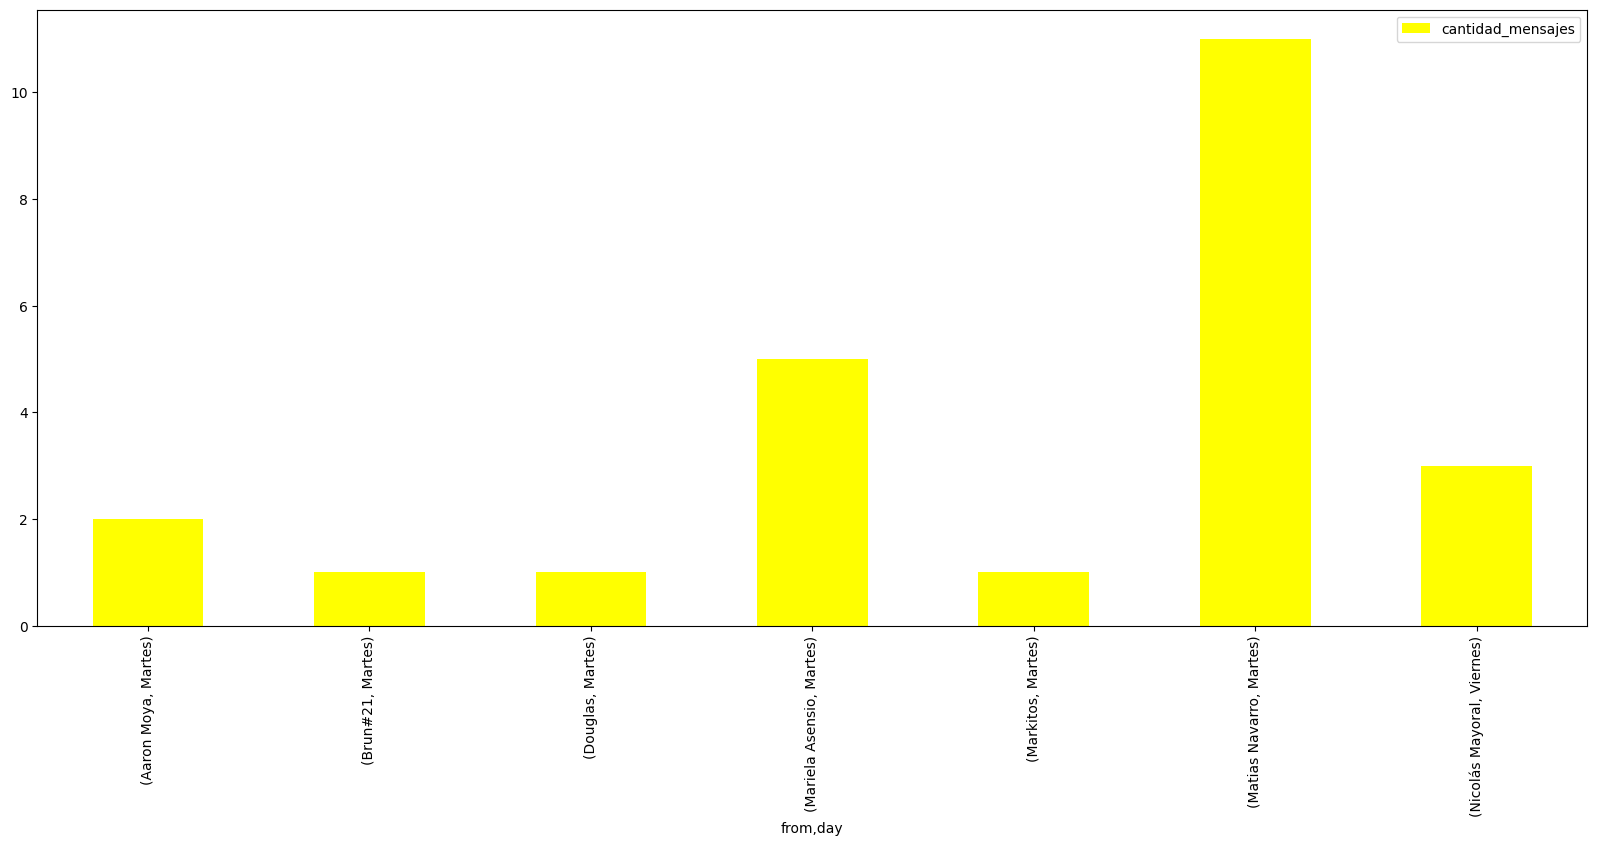

In [27]:
df['fecha'] = [str(x).split("T") for x in df['date']]
contador = int(0)
for i in df['fecha']:
    df['fecha'][contador] = i[0]
    contador += 1
df['fecha'] = pd.to_datetime(df['fecha'], format="%Y-%m-%d")
numero_dias = (df['fecha'].max() - df['fecha'].min()).days
grupos = ['from']
df.groupby(grupos).agg(mensaje = ("text", lambda x: (x.count()/24)/numero_dias))
df2.plot(kind='bar', figsize=(20,8), color="yellow")
df2

## 7


/tmp/ipykernel_6259/2322932550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'][contador] = i[0]


mensajes_totales
from            fecha                  
Aaron Moya      1              0.297872
Brun#21         1              0.148936
Douglas         1              0.148936
Mariela Asensio 0              0.148936
                1              0.744681
Markitos        1              0.148936
Matias Navarro  0              0.446809
                1              1.638298
                3              0.148936
                4              0.297872
Nicolás Mayoral 1              0.297872
                4              0.446809

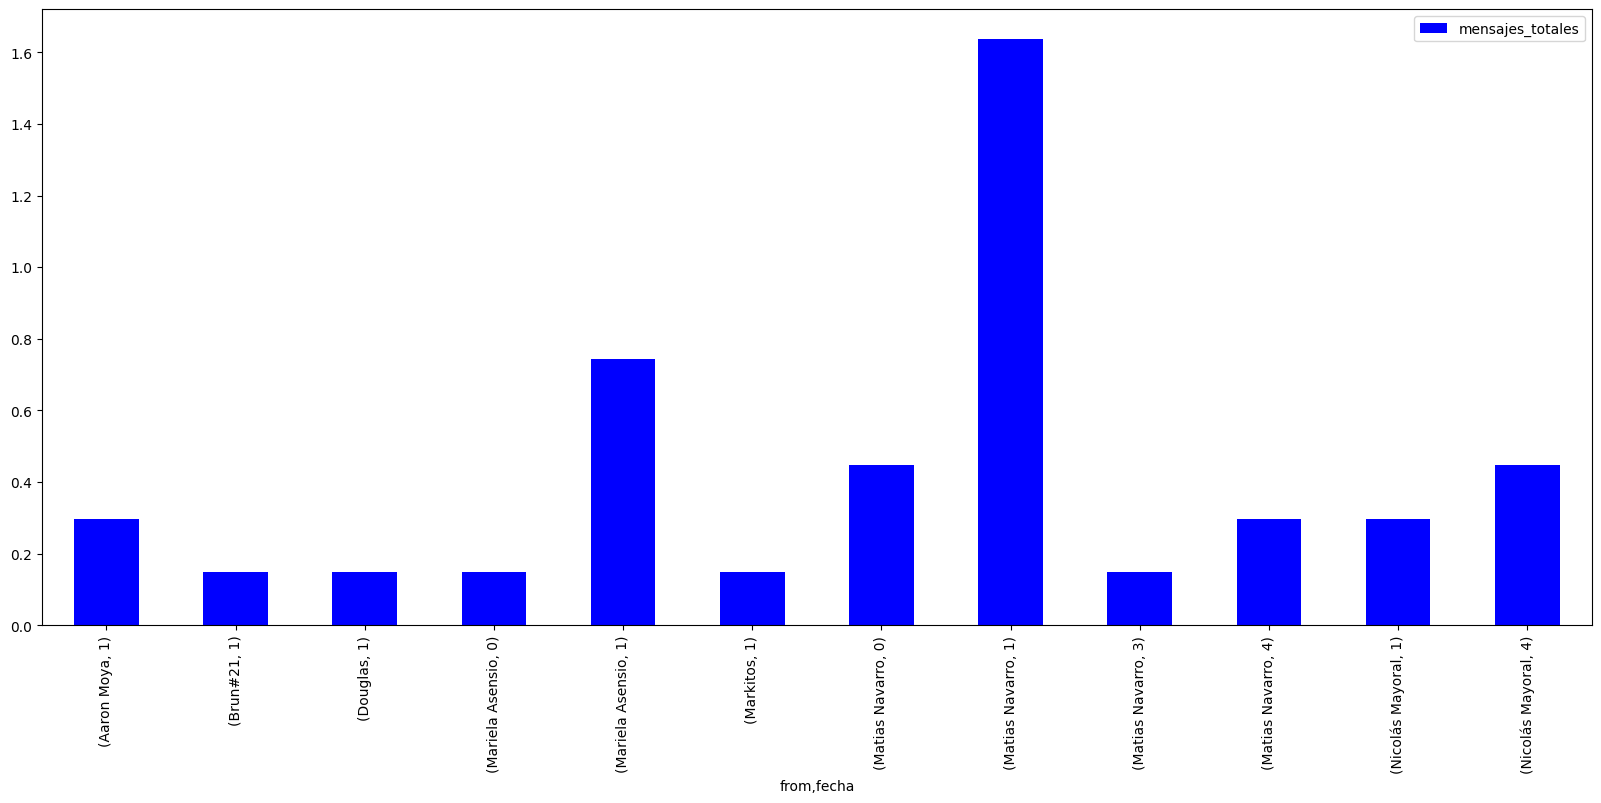

In [29]:
df['fecha'] = [str(x).split("T") for x in df['date']]
contador = int(0)
for i in df['fecha']:
    df['fecha'][contador] = i[0]
    contador += 1
df['fecha'] = pd.to_datetime(df['fecha'], format="%Y-%m-%d")
numero_semanas = ((df['fecha'].max() - df['fecha'].min()).days)/7
grupos = ['from',df['fecha'].dt.weekday]
df_aux = df.groupby( grupos).agg(mensajes_totales=('from',lambda x: x.count()/numero_semanas))
df_aux.plot(kind='bar', figsize=(20,8), color="blue")
df_aux


## 8


/tmp/ipykernel_6259/1498105892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'][contador] = i[0]
/tmp/ipykernel_6259/1498105892.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['año'][contador] = i[0]


cantidad_mensajes
año  mes                   
2022 9                   25
     10                  19

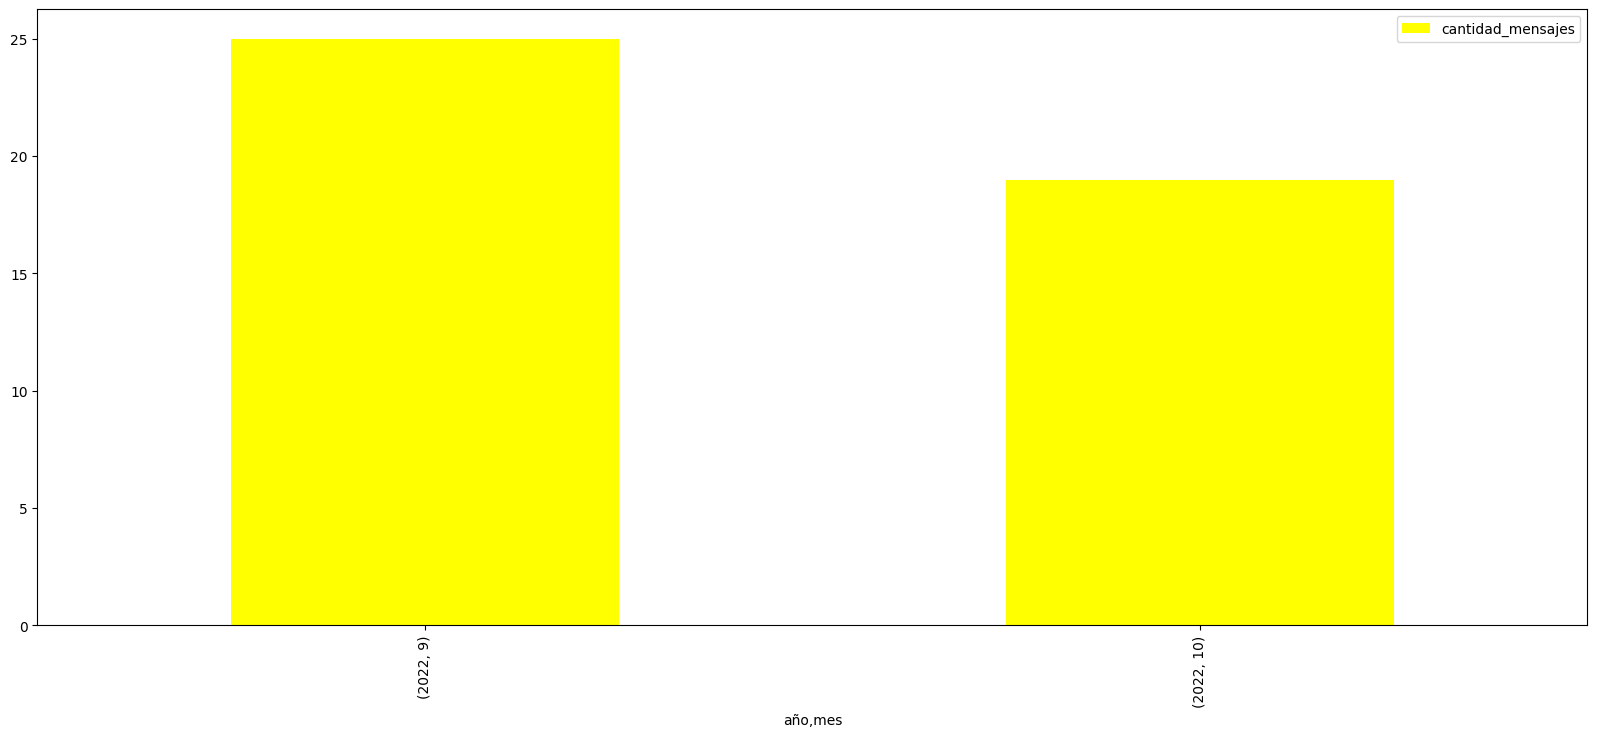

In [31]:
df['fecha'] = [str(x).split("T") for x in df['date']]
contador = int(0)
for i in df['fecha']:
    df['fecha'][contador] = i[0]
    contador += 1
df['año'] = [str(x).split("-") for x in df['date']]
contador = int(0)
for i in df['año']:
    df['año'][contador] = i[0]
    contador += 1
df['mes'] = pd.to_datetime(df['fecha'], format = "%Y-%m-%d")
df2 = df.groupby(['año',df['mes'].dt.month]).agg(cantidad_mensajes = ('text', "count"))
df2.plot(kind='bar', figsize=(20,8), color="yellow")
df2


## 9


/tmp/ipykernel_6259/874140238.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cantidad_palabras'][i] = len(df['palabras'][i])


,minimo,maximo,promedio
type,,,
message,2,117,25.068182


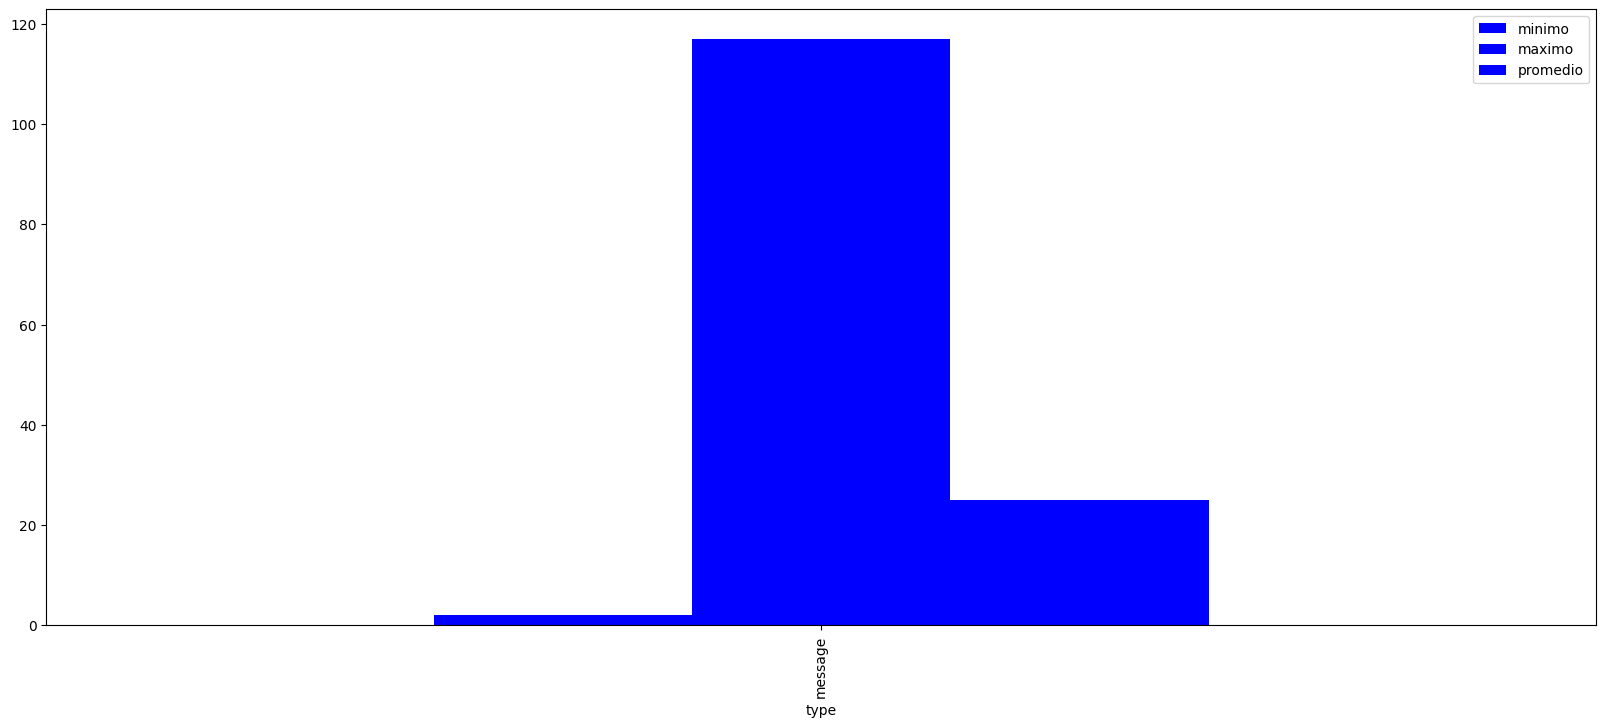

In [33]:
df['palabras'] = [str(x).split(" ") for x in df['text']]
df['cantidad_palabras'] = ''
for i in range(len(df)):
    df['cantidad_palabras'][i] = len(df['palabras'][i])
df2 = df.groupby(['type']).agg(minimo = ('cantidad_palabras', "min"), maximo = ('cantidad_palabras', "max"), promedio = ("cantidad_palabras", lambda x: (x.sum())/len(df['cantidad_palabras']))) 
df2 = df2.drop('service')
df2.plot(kind='bar', figsize=(20,8), color="blue")
df2